Exploratory Data Analysis

# Exploratory Data Analysis


### STEP 1: Understanding the data  




In [ ]:
# Load the dataset from a CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option("max_columns",200) --- not needed for this dataset since we only have 7 columns

# Load the dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")


print("\nDataframe Shape: ", df.shape)  # 126 rows , 7 columns
# Print out the first few rows of the dataframe
# Display the first few rows of the dataframe
print("\nDataframe HEAD: ", df.head())

# Get a summary of the dataframe
print("\nDataframe Summary: ", df.describe())

# List out all columns of the dataframe

print("\nDataframe Columns: ", df.columns)

print("\nDataframe Dtypes: ", df.dtypes)
# Check for missing values
print("\nMissing Values count: ", df.isnull().sum())


# Step 2 : Data Preparation / Cleaning 
### (not required here since our data has no missing values and is all integers) 



# Step 3: Feature Understanding / Univariate Analysis

Understand distribution of features and find some potential outliers in the dataset

In [ ]:


'''
Univariate analysis is a statistical method that examines a single variable in a 
data set. It's a fundamental type of data analysis that's used to describe 
and summarize data. 

Single column in a database is a Series
'''
# values_counts counts how many unique values occured
# and orders them from most to least occuring value range


print(df["X1"].value_counts())


# Plotting the X1 value counts
df["X1"].value_counts().plot(kind='bar')


# Fix for horizontal x-axis labels
plt.xticks(rotation=0, ha="right")

plt.xlabel('Customer rating for satisfaction with Courier')

plt.ylabel('Count')

# Plot the distribution of each feature
# This is a good way to visualize the distribution of each feature
# df.hist(bins=15, figsize=(15, 10))
# plt.suptitle('Feature Distributions')
# plt.show()

# # Correlation matrix
# # This is a good way to visualize the correlation between features
# corr = df.corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# # Boxplot for each feature
# # This is a good way to visualize the distribution of each feature
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df)
# plt.title('Boxplot of Features')
# plt.xticks(rotation=90)
# plt.show()


# Get Distribution of Column Using Histogram

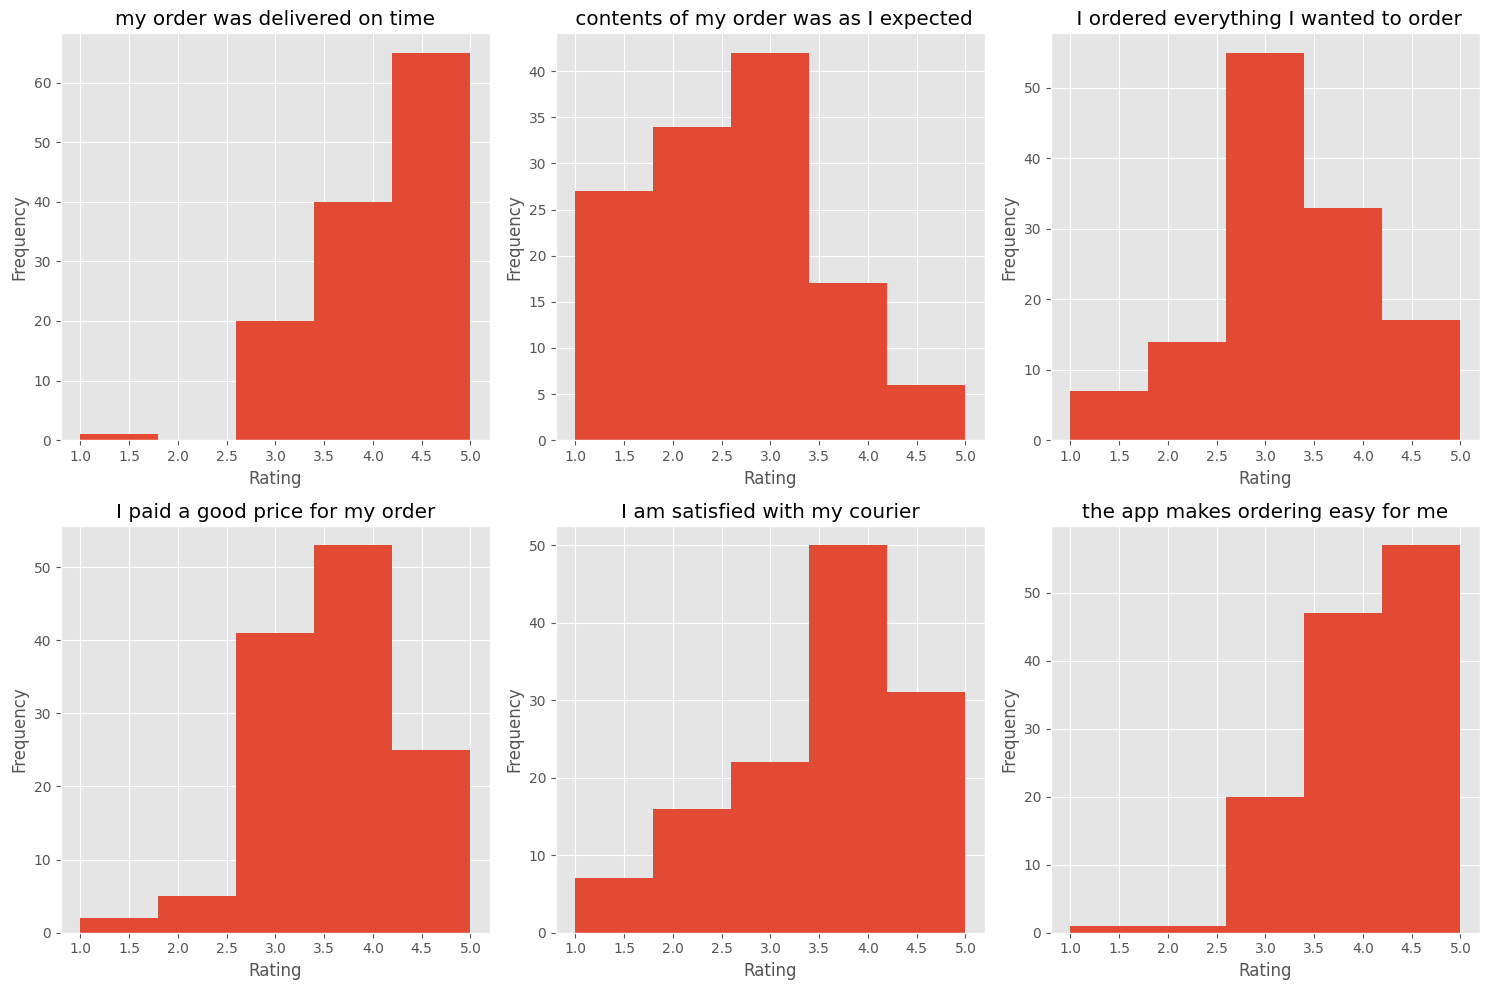

In [ ]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Create a histogram for each feature
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
meaning = ["my order was delivered on time",
           " contents of my order was as I expected",
           " I ordered everything I wanted to order",
           "I paid a good price for my order",
           "I am satisfied with my courier",
           "the app makes ordering easy for me"]
for i, feature in enumerate(features):
    ax = axs[i // 3, i % 3]  # get the current subplot
    df[feature].plot(kind='hist', bins=5, ax=ax)
    ax.set_title(meaning[i])  # set the title to the feature name
    ax.set_xlabel('Rating')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()


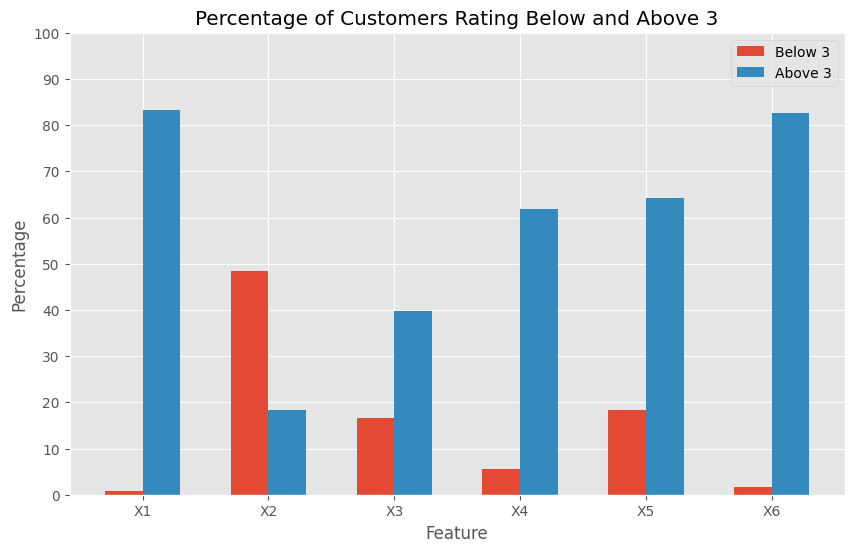

In [ ]:
# Create a dictionary to store the results
results = {}

# Loop through each feature
for feature, mean in zip(features, meaning):
    # Calculate the percentage of customers rating below 3
    below_3 = (df[feature] < 3).sum() / len(df) * 100
    # Calculate the percentage of customers rating above 3
    above_3 = (df[feature] > 3).sum() / len(df) * 100
    # Store the results in the dictionary
    results[mean] = {
        'Below 3': below_3,
        'Above 3': above_3
    }

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot with thin bars and separate bars for each feature
bar_width = 0.3
x = np.arange(len(features))
ax.bar(x - bar_width/2, [values['Below 3']
       for values in results.values()], width=bar_width, label='Below 3')
ax.bar(x + bar_width/2, [values['Above 3']
       for values in results.values()], width=bar_width, label='Above 3')

# Set the title and labels
ax.set_title('Percentage of Customers Rating Below and Above 3')
ax.set_xlabel('Feature')
ax.set_ylabel('Percentage')

# Set the xticks to the feature labels
ax.set_xticks(x)
ax.set_xticklabels(features)

# Set the y-axis scale to be more detailed
ax.set_yticks(np.arange(0, 110, 10))

# Add a legend
ax.legend()

# Show the plot
plt.show()


# Observations:

### X1: my order was delivered on time
majority of the data is between 4-5 (good) 
minority have rated 1 

### X2: contents of my order was as I expected
Most people have rated 3 or lower (bad)  
minority have rated 5
### X3: I ordered everything I wanted to order
Most people have rated 3 or above (good) 
minorty have rated below 3
### X4: I paid a good price for my order
Most people have rated 3 or above (good)
minorty have rated below 3

### X5: I am satisfied with my courier
Majority have rated 3.5 or above (good)
### X6: the app makes ordering easy for me

### Conclusion:

Majority of the customers are happy with the Courier Service